In [92]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import matplotlib.patches as mpatches
import pandas as pd
import secrets
from networkx.algorithms import community

%matplotlib inline

In [289]:
# Extract the 'dn_hemisphere' attribute of each node and store it in a list
def hemisphere(G):
    hemisphere = []
    for node in G.nodes():
        if 'dn_hemisphere' in G.nodes[node]:
            hemisphere.append(G.nodes[node]['dn_hemisphere'])
    return hemisphere

#generate list of all parent regions with no duplicates
def parentregion(G):
    allparents = []
    for node in G.nodes():
        if 'dn_fsname' in G.nodes[node]:
            s = G.nodes[node]['dn_fsname']
            substrings = s.split("_")
            allparents.append(substrings[0])
    parents = list(set(allparents))
    return parents

#generate list of all parent regions, hemisphere specific, with no duplicates
def parenthem(G):
    allregions = []
    for node in G.nodes():
        if 'dn_name' in G.nodes[node]:
            s = G.nodes[node]['dn_name']
            substrings = s.split("_")
            allregions.append(substrings[0])
    allregions = list(set(allregions))
    return allregions

# Generate n random colors in hexadecimal format
def generatecolors(n):
    colors = ['#' + hex(secrets.randbits(24))[2:].zfill(6) for _ in range(n)]
    return colors

#create a dictionary where nodes are keys and values are parent regions stored as integers
def makez(G):
    parents = parentregion(G)
    allparents = []
    for node in G.nodes():
        if 'dn_fsname' in G.nodes[node]:
            s = G.nodes[node]['dn_fsname']
            substrings = s.split("_")
            allparents.append(parents.index(substrings[0]))

    z = {i+1: val for i, val in enumerate(allparents)}
    return z

#plot of the CCDF of the degree distribution Pr(K>=k) for k>=1
def plot_CCDF(kis):
    # input : a list of degrees, e.g., from a networkx graph G
    # output: a plot of the CCDF of the degree distribution Pr(K>=k) for k>=1

    kmax = max(kis)

    # histogram and plot
    counts, bins = np.histogram(kis, bins=[i for i in range(kmax+2)], density=True)
    cumcounts = np.cumsum(counts)
    cumcounts = np.insert(cumcounts,0,0)
    plt.loglog(bins[1:-1], 1-cumcounts[1:-1], 'rs', alpha=0.5)
    plt.xlabel('Degree, k')
    plt.ylabel('Pr(K>=k)')
    plt.show()
    return

In [290]:
#compute stats with non hemisphere specific regions
def compute_stats(G,parent_colors):
    n = len(nx.nodes(G)) # num nodes 
    m = len(nx.edges(G)) # num edges
    kmean = (2*m)/n # mean degree formula for undirected graph
    C = nx.transitivity(G) # clustering coeffcient

    print(f'number of nodes, n  = {n}')
    print(f'number of edges, m  = {m}')
    print(f'mean degree,    <k> = %5.2f' % kmean)
    print(f'clustering coefficient, C     = %5.2f' % C)
    #print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
    deg = [x[1] for x in nx.degree(G)] # putting the degree component of nx.degree into an array
    plt.rcParams["figure.figsize"] = (15,10)
    node_ops = {"node_size":50}
    edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
    pos=nx.spring_layout(G)
    
    parent_dict = {}
    parents = parentregion(G)
    for i, parent in enumerate(parents):
        parent_dict[parent] = parent_colors[i]

    colors = [parent_dict[G.nodes[node]['dn_fsname'].split("_")[0]] for node in G.nodes()]
    plot_CCDF(deg)
    limits=plt.axis('off')
    nx.draw_networkx_nodes(G, pos, **node_ops, node_color=colors)
    nx.draw_networkx_edges(G, pos, **edge_ops)
    #nx.draw_networkx_labels(G,pos)
    
    handles = [mpatches.Patch(color=color, label=parent) for parent, color in parent_dict.items()]
    plt.legend(handles=handles, title='Parent Region', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

#compute stats with hemisphere specific regions
def compute_stats_full(G,parent_colors):
    n = len(nx.nodes(G)) # num nodes 
    m = len(nx.edges(G)) # num edges
    kmean = (2*m)/n # mean degree formula for undirected graph
    C = nx.transitivity(G) # clustering coeffcient

    print(f'number of nodes, n  = {n}')
    print(f'number of edges, m  = {m}')
    print(f'mean degree,    <k> = %5.2f' % kmean)
    print(f'clustering coefficient, C     = %5.2f' % C)
    #print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)
    deg = [x[1] for x in nx.degree(G)] # putting the degree component of nx.degree into an array
    plt.rcParams["figure.figsize"] = (15,10)
    node_ops = {"node_size":50}
    edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
    pos=nx.spring_layout(G)
    
    parent_dict = {}
    parents = parenthem(G)
    for i, parent in enumerate(parents):
        parent_dict[parent] = parent_colors[i]

    colors = [parent_dict[G.nodes[node]['dn_name'].split("_")[0]] for node in G.nodes()]
    plot_CCDF(deg)
    limits=plt.axis('off')
    nx.draw_networkx_nodes(G, pos, **node_ops, node_color=colors)
    nx.draw_networkx_edges(G, pos, **edge_ops)
    #nx.draw_networkx_labels(G,pos)
    
    handles = [mpatches.Patch(color=color, label=parent) for parent, color in parent_dict.items()]
    plt.legend(handles=handles, title='Parent Region', loc='upper left', bbox_to_anchor=(1, 1),ncol = 2)
    plt.show()

#compute stats only on hemispheres
def compute_stats_hemisphere(G):
    plt.rcParams["figure.figsize"] = (15,10)
    node_ops = {"node_size":50}
    edge_ops = {"width": .50, "alpha": 1, "edge_color": "black"}
    pos=nx.spring_layout(G)

    parent_colors = ['blue','red']
    parent_dict = {}
    parents = hemisphere(G)
    parents = list(set(parents))
    for i, parent in enumerate(parents):
        parent_dict[parent] = parent_colors[i]

    colors = [parent_dict[G.nodes[node]['dn_hemisphere']] for node in G.nodes()]
    limits=plt.axis('off')
    nx.draw_networkx_nodes(G, pos, **node_ops, node_color=colors)
    nx.draw_networkx_edges(G, pos, **edge_ops)
    #nx.draw_networkx_labels(G,pos)

    handles = [mpatches.Patch(color=color, label=parent) for parent, color in parent_dict.items()]
    plt.legend(handles=handles, title='Hemisphere', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

number of nodes, n  = 1015
number of edges, m  = 37477
mean degree,    <k> = 73.85
clustering coefficient, C     =  0.51


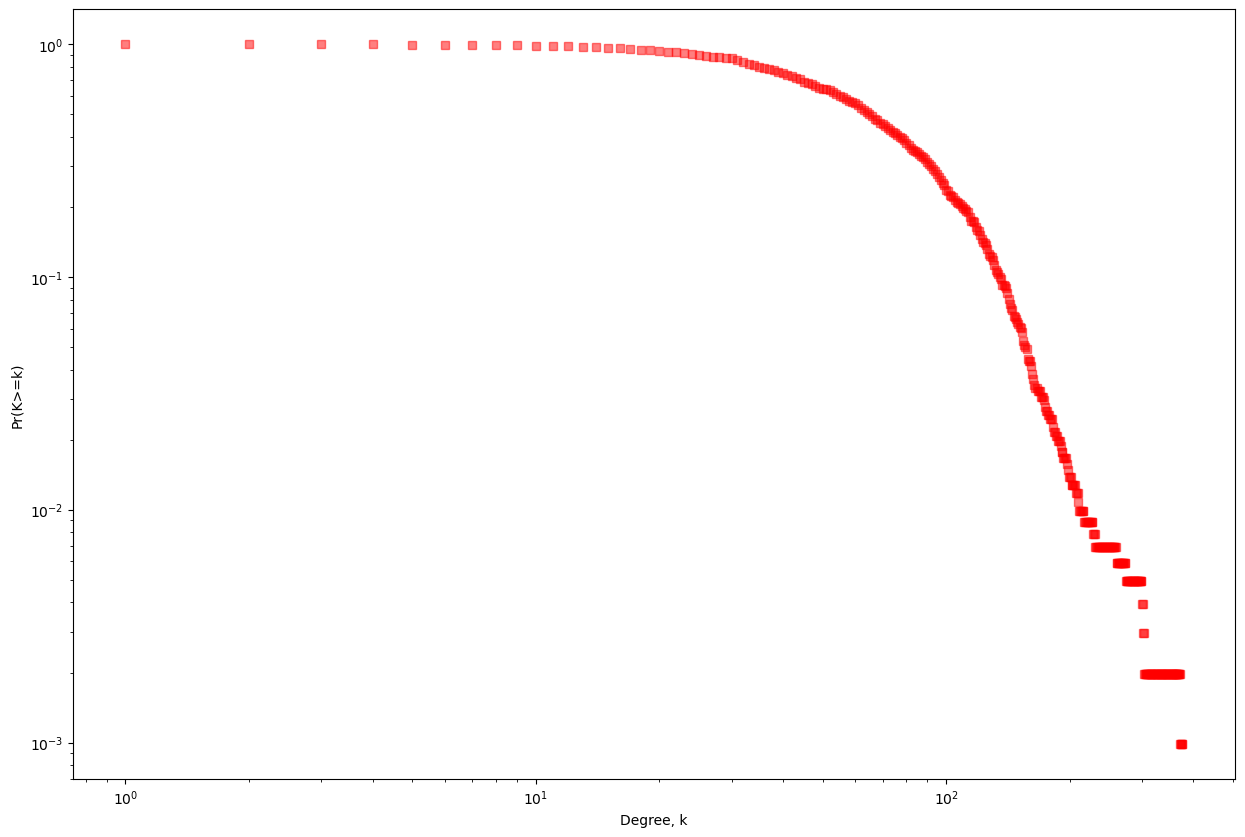

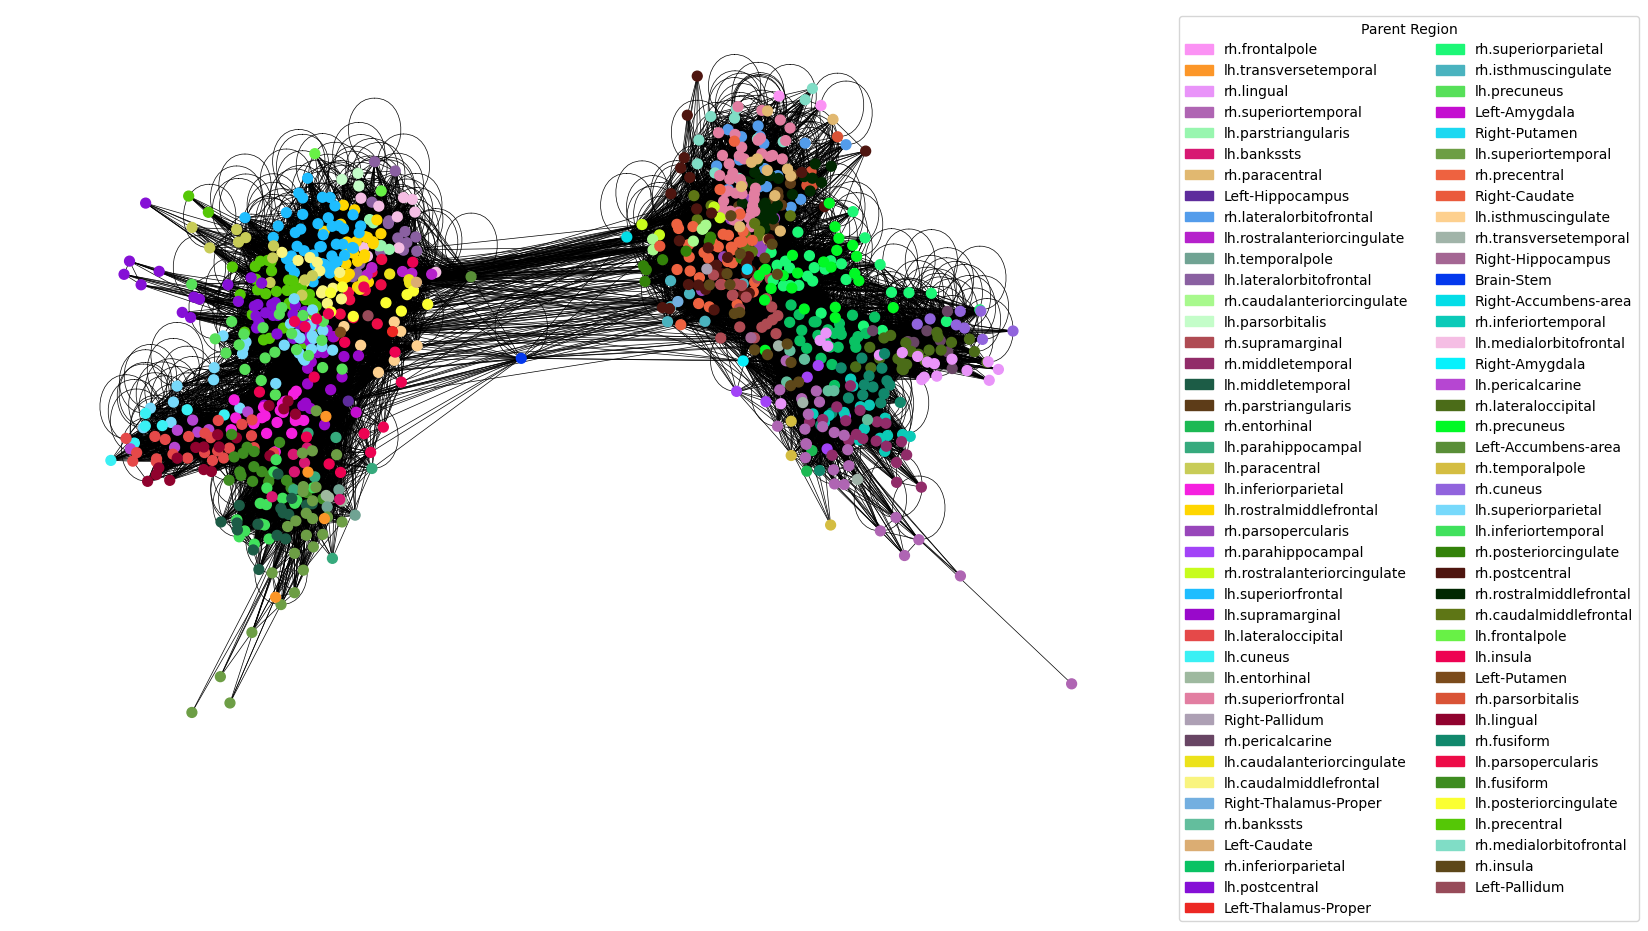

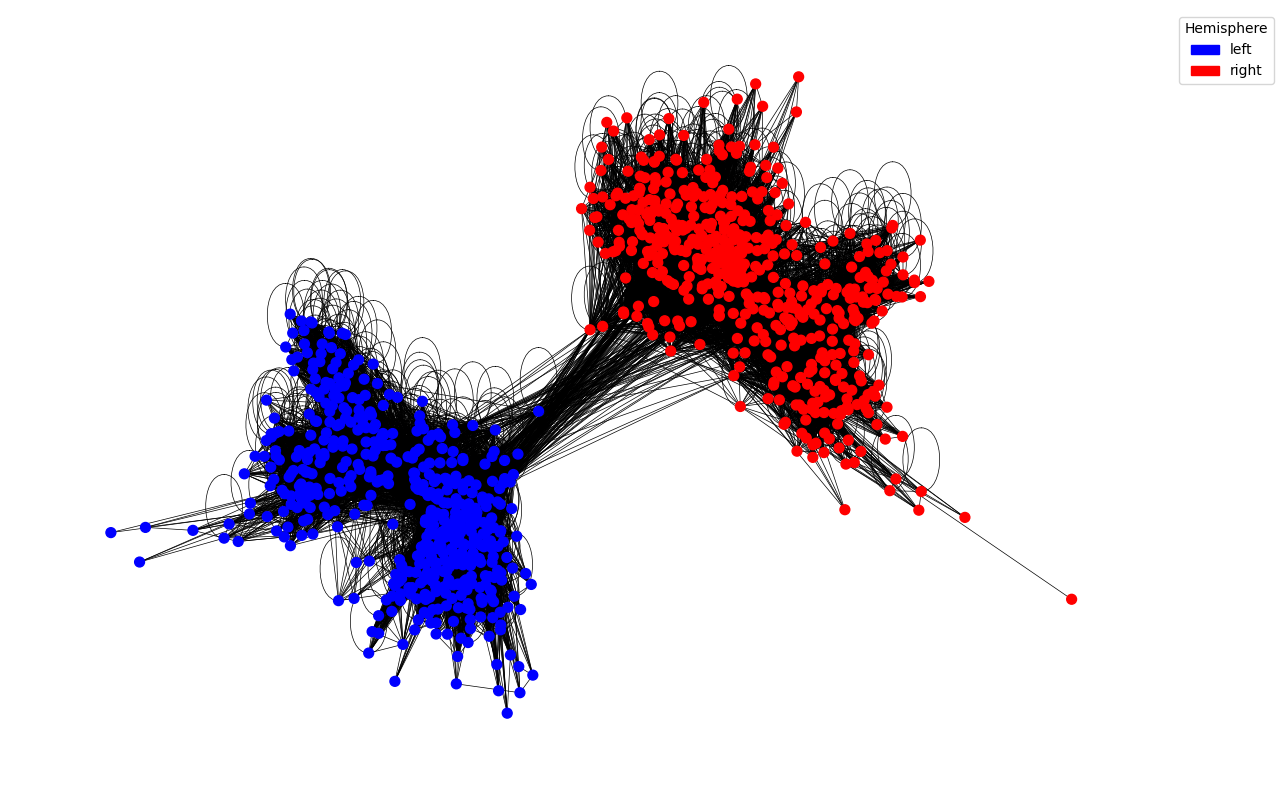

In [291]:
fname1 = 'budapest_connectome_low_confidence.graphml'
fname2 = 'budapest_connectome_medium_confidence.graphml'
fname3 = 'budapest_connectome_high_confidence.graphml'

G1 = nx.read_graphml('./' + fname1)
G2 = nx.read_graphml('./' + fname2)
G3 = nx.read_graphml('./' + fname3)

parent_colors = generatecolors(83)

compute_stats_full(G1,parent_colors)
#compute_stats(G1,parent_colors)
compute_stats_hemisphere(G1)

number of nodes, n  = 1015
number of edges, m  = 1000
mean degree,    <k> =  1.97
clustering coefficient, C     =  0.12


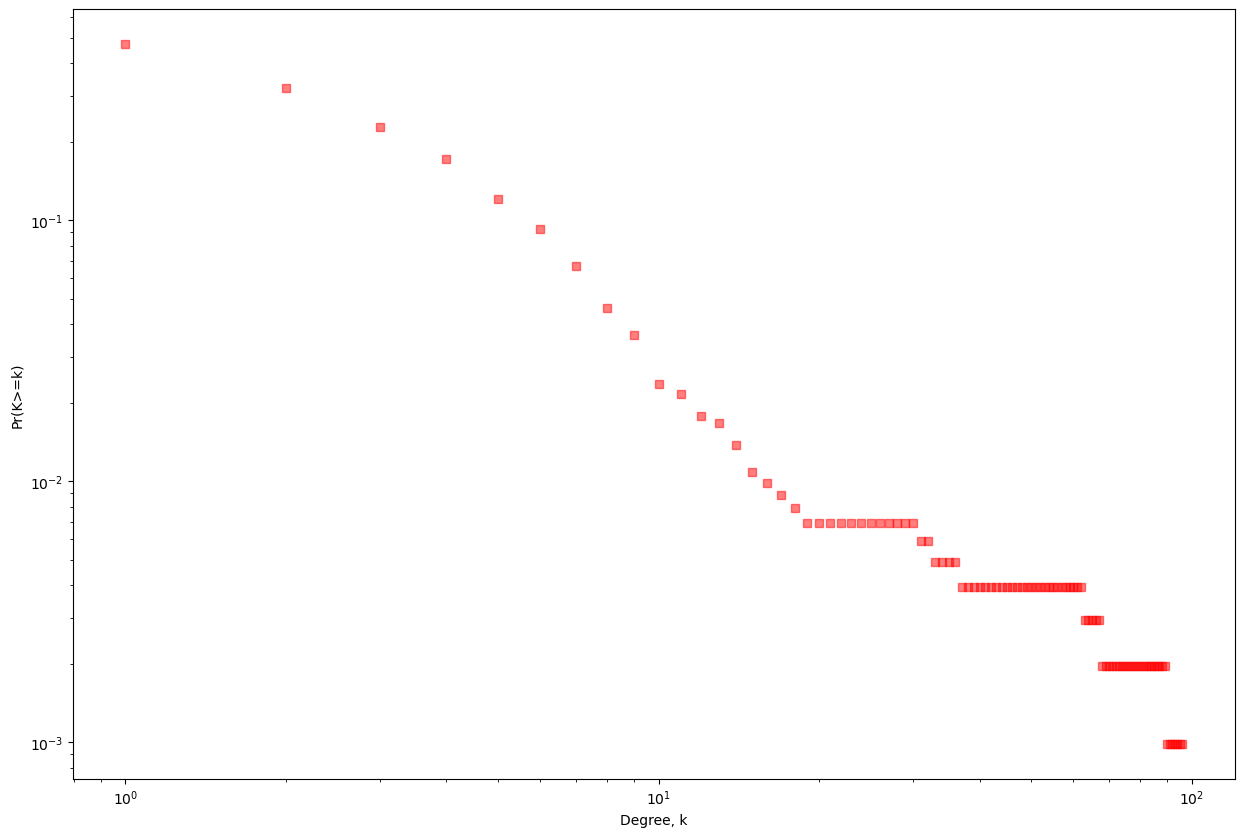

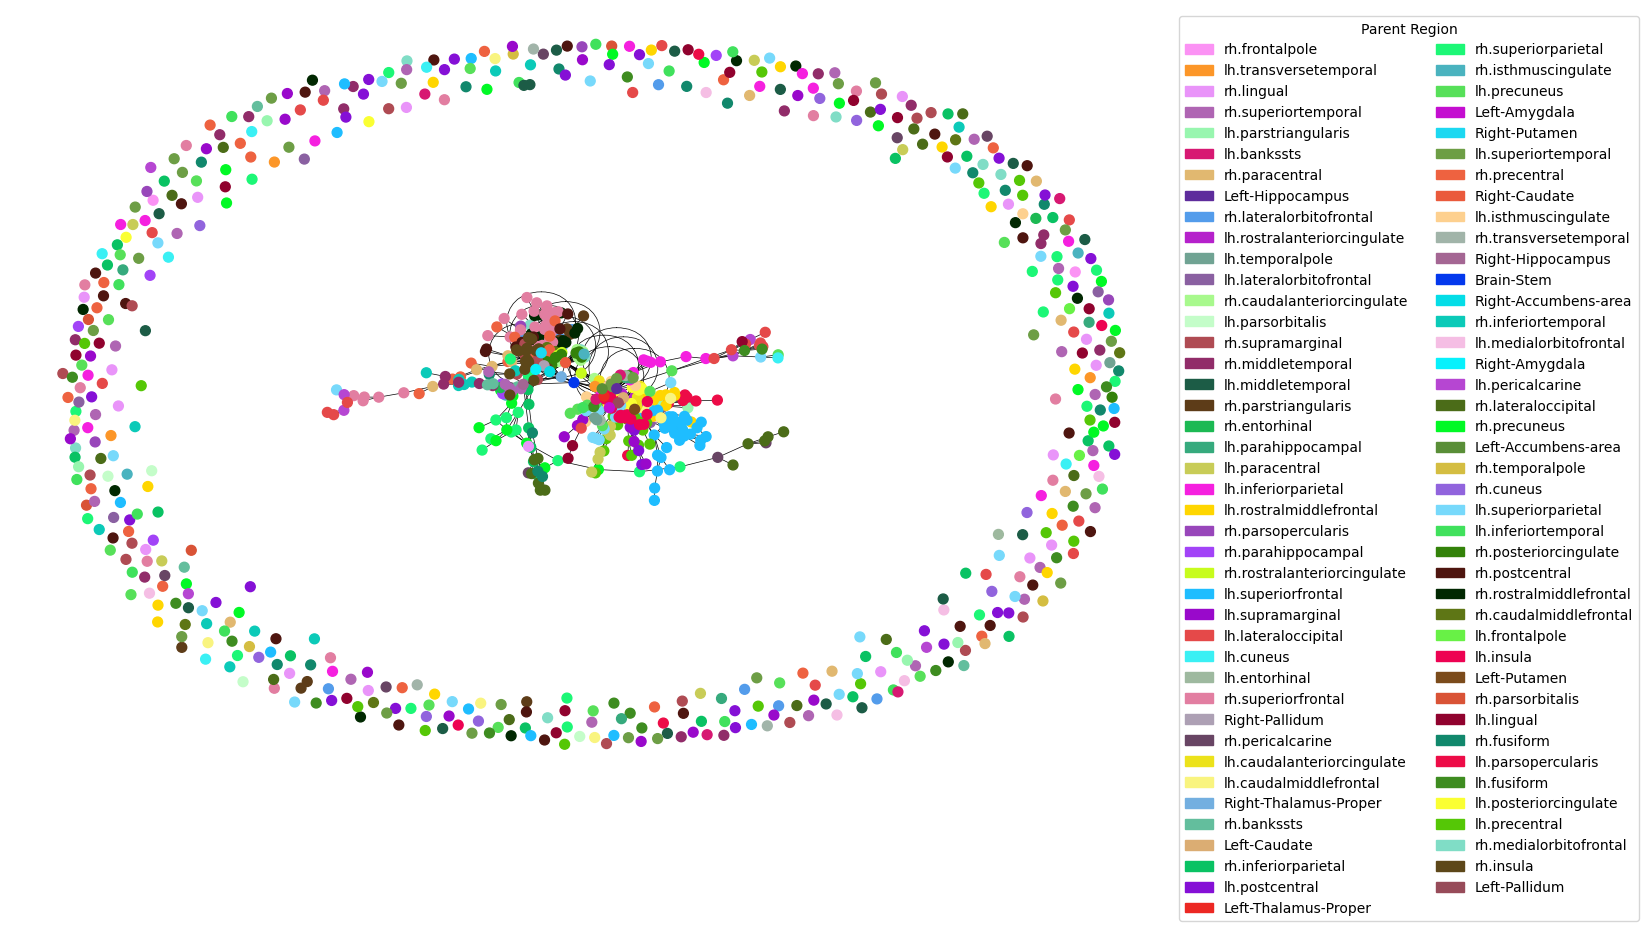

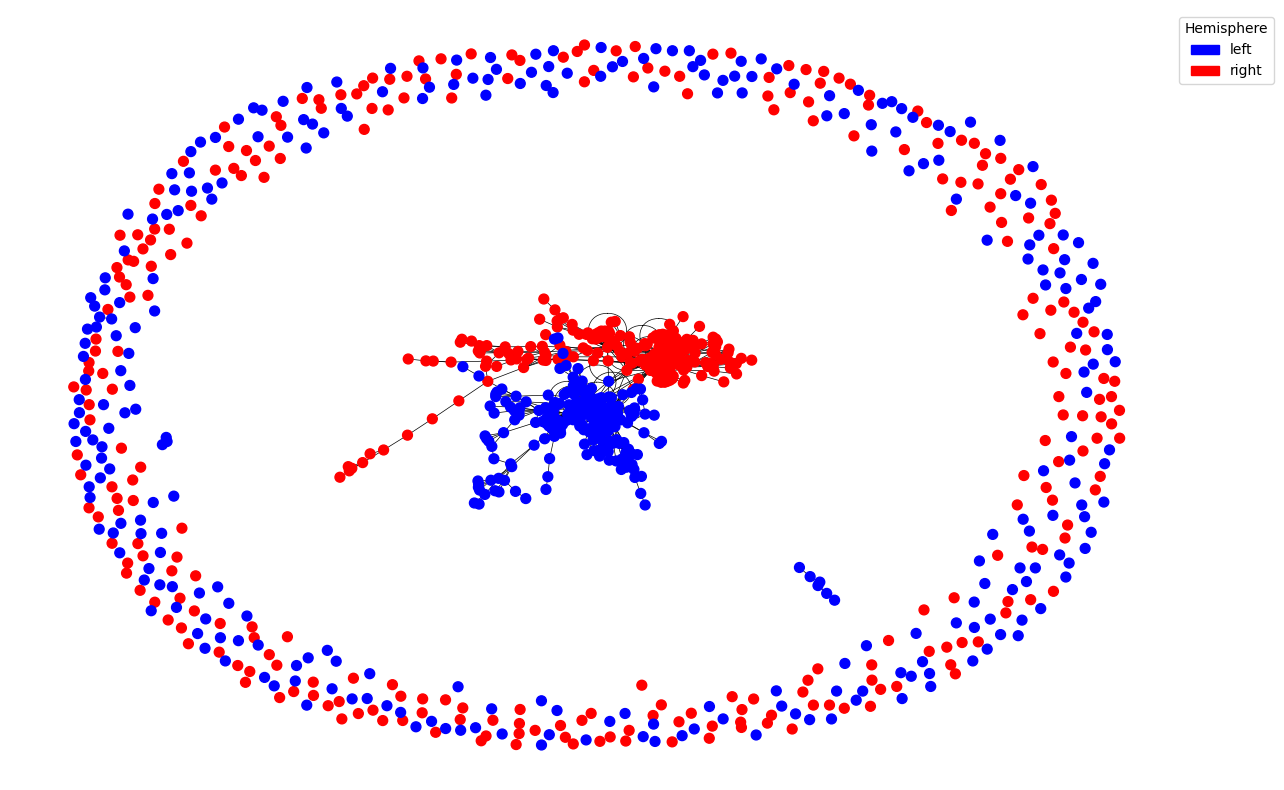

In [292]:
compute_stats_full(G2,parent_colors)
compute_stats_hemisphere(G2)

number of nodes, n  = 1015
number of edges, m  = 16
mean degree,    <k> =  0.03
clustering coefficient, C     =  0.35


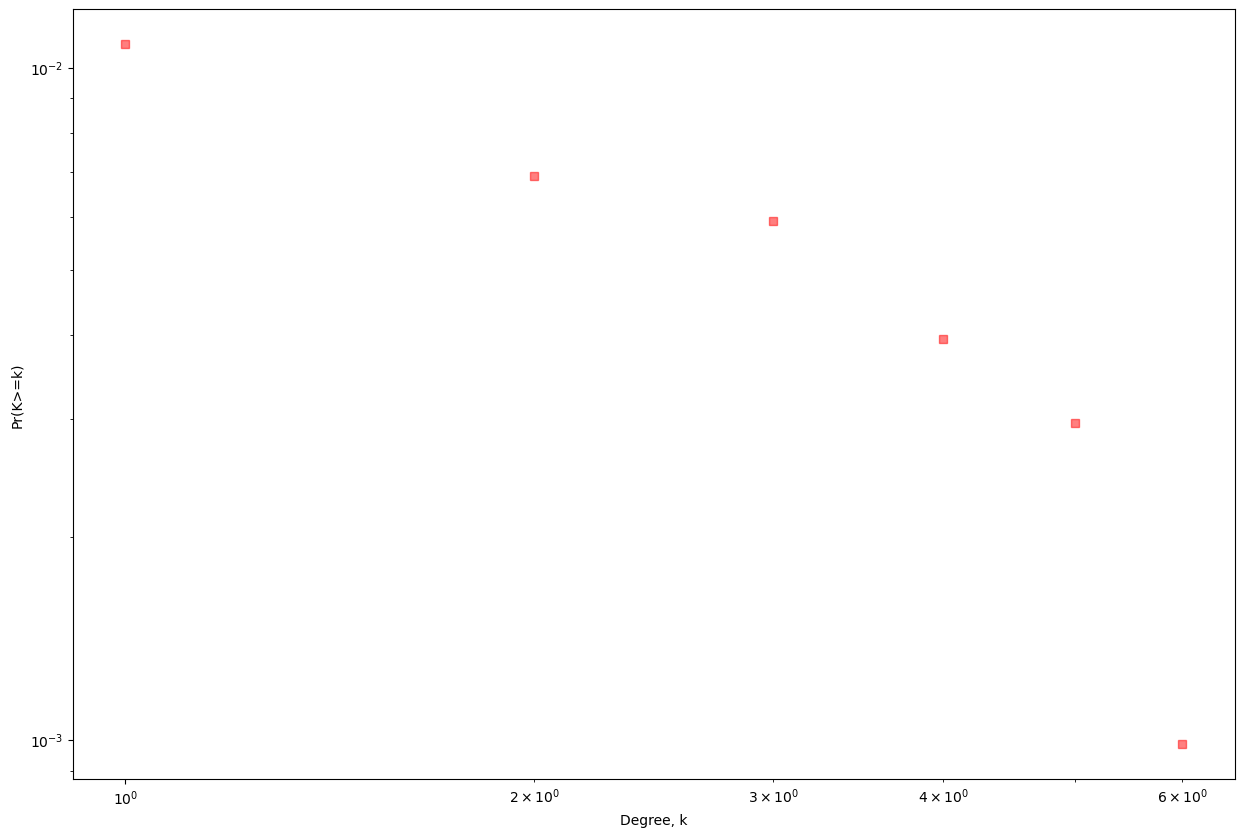

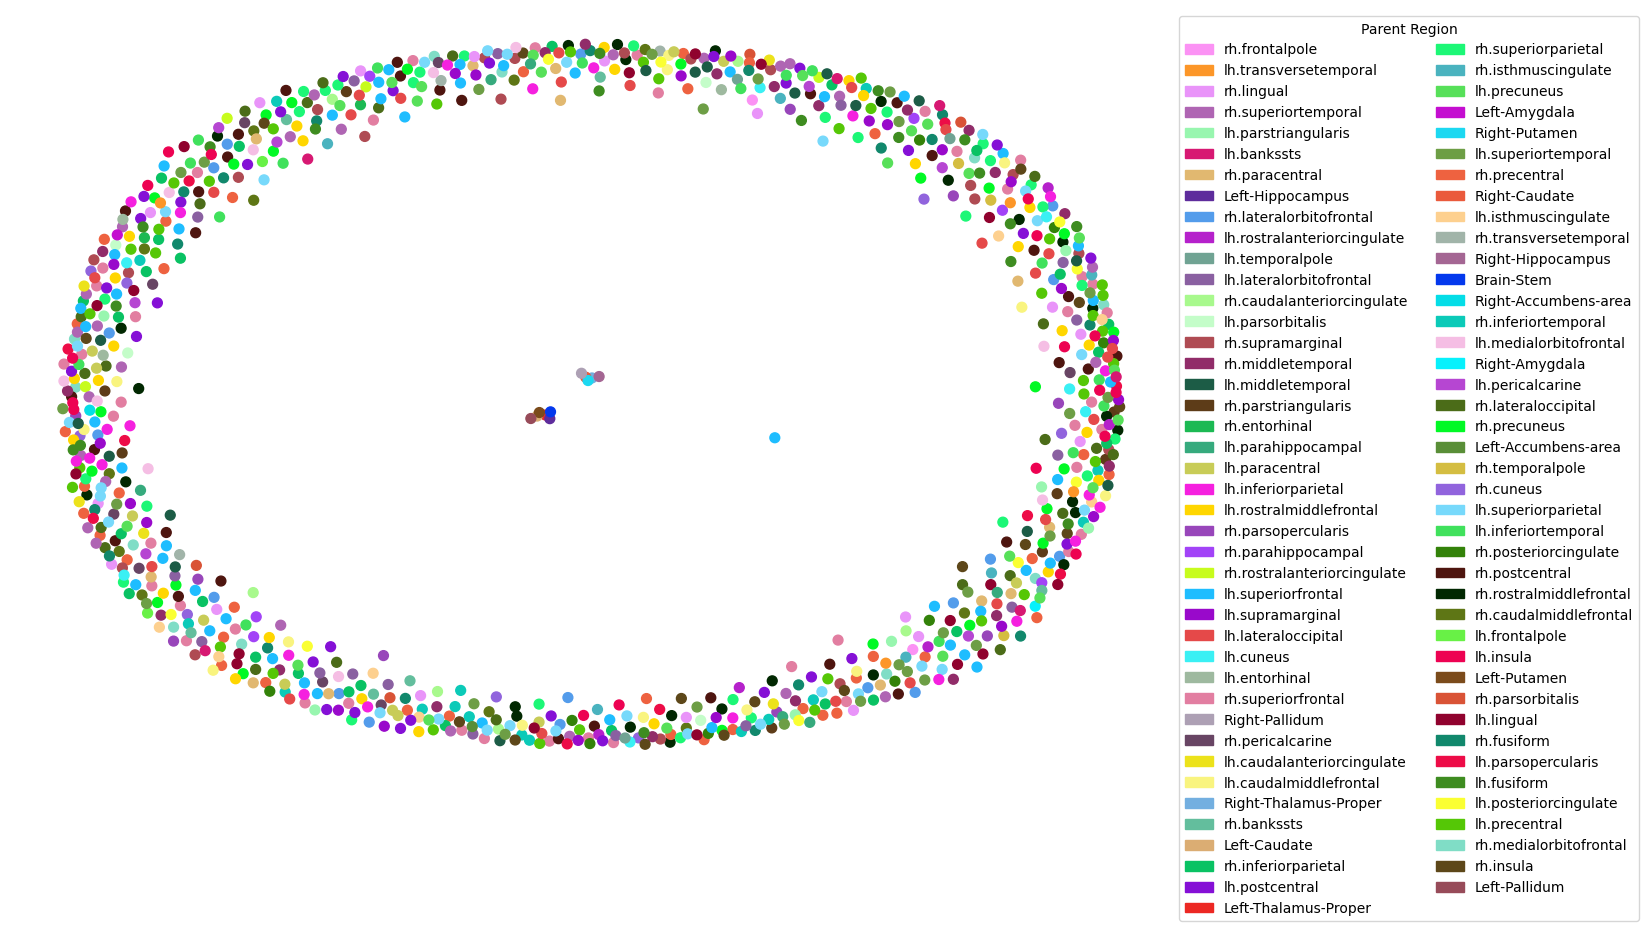

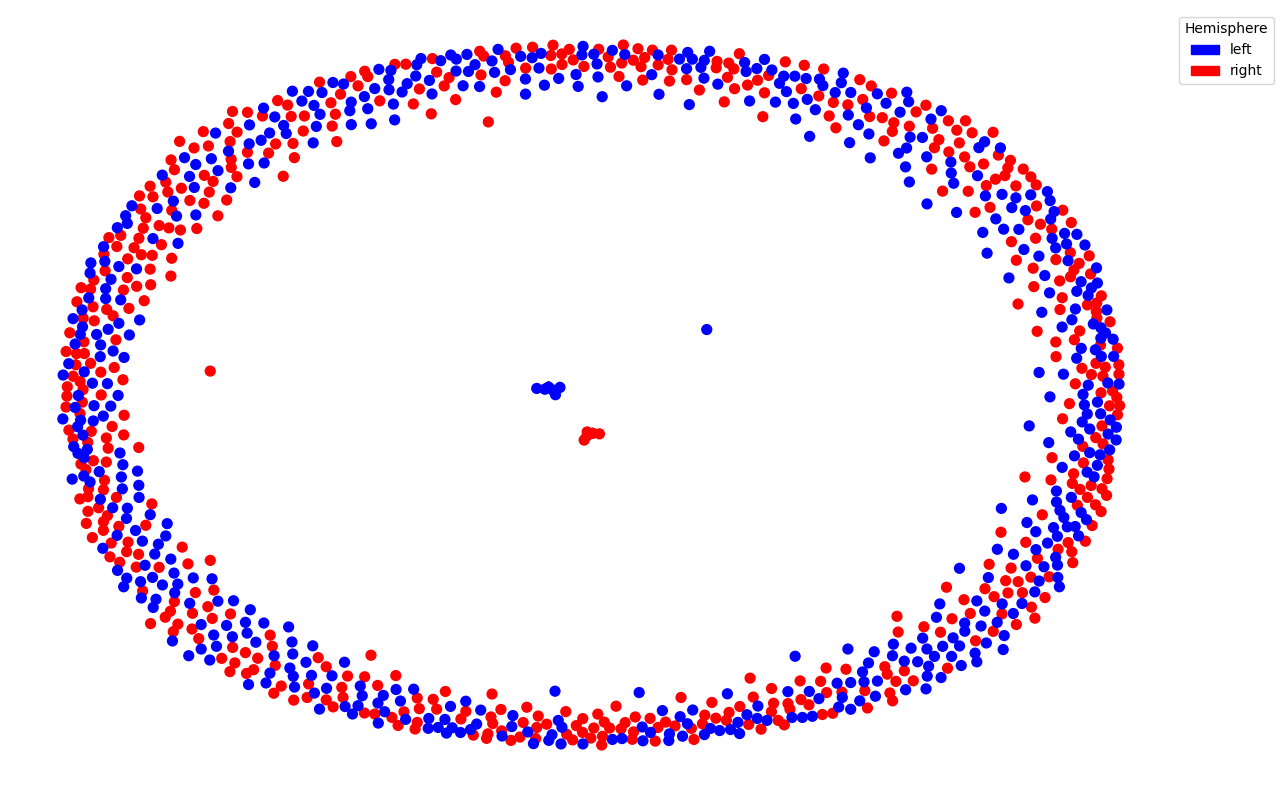

In [293]:
compute_stats_full(G3,parent_colors)
compute_stats_hemisphere(G3)

>As edge confidence increases, the number of edges decreases. This corresponds to a drop in certainty that two regions interact. However, this allows us to say with high certainty which regions interact consistently among humans. This connectome, which is the cumilation of 477 different human brains of which MRI's were taken, demonstrates that there are 6 parent regions that interact consistently among participants. 

In [ ]:
##CORRECT FUNCTIONS
def drawGz(G,z):
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    values = []
    values = list(z.values())
    node_colors = []

    if len(list(set(values))) == 2:
        colors = ['blue','red']
    else:
        colors = parent_colors
        

    node_colors = []
    for i in values:
        node_colors.append(colors[int(i)])

    nx.draw_networkx(G,with_labels=False,node_size=100,width=0.5,node_color=node_colors,alpha=1,edge_color = 'black') # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

def tabulate_wk(G,z,c):
     # This function tabulates the w_rs and kappa_r auxiliary data structures for the DC-SBM
    #
    # input  : G is simple graph with n nodes
    #        : z is a dictionary of group labels for G's nodes, into c groups
    #        : c is scalar, number of possible groups
    # output : wrs, kpr
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted
    
    wrs = np.zeros([c,c]) # count of stubs from group r to group s

    for e in list(G.edges()):
        # loop through all edges and add 1 to every box of the matrix that the edge corresponds to. This will properly
        # double count the stubs since we are flipping the indexes and adding twice.
        wrs[z[int(e[0])], z[int(e[1])]] += 1
        wrs[z[int(e[1])], z[int(e[0])]] += 1
    # kpr is just the sum of either each row or column, total degree of a group.
    kpr = np.sum(wrs, axis = 0)
    kpr = kpr.T

    return wrs,kpr

def update_wk(wrs, i, G, z, r, s):
    # This function will update the wrs matrix and kpr list given a single node changed groups. This basically allows us to loop over only the nodes edges and not all 
    # the edges in the graph. 
    new_wrs = copy.deepcopy(wrs)
    for e in list(G.edges(i)):
        
        x = z[int(e[1])]
        new_wrs[x,s] -= 1
        new_wrs[s,x] -= 1
        new_wrs[x,r] += 1
        new_wrs[r,x] += 1
    new_kpr = np.sum(new_wrs, axis = 0)   
    new_kpr = new_kpr.T
    
    
    # attempt at vectorization
    # n_temp = list(G.adj[i])
    # if len(n_temp) == 0:
    #     new_kpr = np.sum(new_wrs, axis = 0)   
    #     new_kpr = new_kpr.T
    #     return new_wrs, new_kpr
    # labels = z[n_temp]
    # for y in range(wrs.shape[0]):
    #     if y == 0:
    #         temp = len(labels) - np.count_nonzero(labels)
    #     else:
    #         temp = np.count_nonzero(labels == y)
    #     new_wrs[s,y] -= temp
    #     new_wrs[y,s] -= temp
    #     new_wrs[r,y] += temp
    #     new_wrs[y,r] += temp

    return new_wrs,new_kpr


def random_z(n,c):
    # input  : number of nodes n, and number of groups c
    # output : returns a random partition in a dictionary z, where z_i = Uniform(0,c-1)

    import random as rnd
    rnd.seed()
    
    z = dict()

    ##### do not modify above here #####

    
    ### YOUR CODE
    for i in range(1,n+1):
        z[i] = int(rnd.randint(0,c-1))

    ##### do not modify below here #####

    return z

#def dcsbm_LogL(wrs,kpr):
    # DO NOT MODIFY THIS FUNCTION
    # This function calculates the log-likelihood of the degree-corrected stochastic block model (DC-SBM)
    # See Eq. (9) in Lecture 6.
    #
    # input  : wrs is a c x c np.array of stub counts
    #        : kpr is a c x 1 np.array of stub counts 
    # output : the dcsbm log-likelihood
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    #c = wrs.shape[1]  # number of groups
    
    #logL = 0
    #for r in range(c):
        #for s in range(c):
            #if wrs[r,s] < 1 or kpr[r] < 1 or kpr[s] < 1:
                #temp = 0 # define 0^0 = 1
            #else:
                #temp = wrs[r,s]*np.log( wrs[r,s] / (kpr[r]*kpr[s]) )
            #logL = logL + temp
    
    #return logL
    # DO NOT MODIFY THIS 
    

def dcsbm_LogL(wrs,kpr):
    # DO NOT MODIFY THIS FUNCTION
    # This function calculates the log-likelihood of the degree-corrected stochastic block model (DC-SBM)
    # See Eq. (9) in Lecture 6.
    #
    # input  : wrs is a c x c np.array of stub counts
    #        : kpr is a c x 1 np.array of stub counts 
    # output : the dcsbm log-likelihood
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    c = wrs.shape[1]  # number of groups
    
    logL = 0
    #for r in range(c):
    #    for s in range(c):
    #        if wrs[r,s] < 1 or kpr[r] < 1 or kpr[s] < 1:
    #            temp = 0 # define 0^0 = 1
    #        else:
    #            temp = wrs[r,s]*np.log( wrs[r,s] / (kpr[r]*kpr[s]) )
    #        logL = logL + temp
            
    # utilization of matrix symmetry below
    for r in range(c):
        for s in range(r,c):
            if wrs[r,s] < 1 or kpr[r] < 1 or kpr[s] < 1:
                temp = 0 # define 0^0 = 1
            else:
                if r != s:
                    temp = 2*wrs[r,s]*np.log( wrs[r,s] / (kpr[r]*kpr[s]) )
                else:
                    temp = wrs[r,s]*np.log( wrs[r,s] / (kpr[r]*kpr[s]) )
            logL = logL + temp
    
    return logL



def plotLL(LL,pc,n):
    # DO NOT MODIFY THIS FUNCTION
    # This function makes a nice plot of the log-likelihood trajectory
    #
    # input  : LL is list of log-likelihood values of length (n+1)*(pc+1)
    #        : n, number of nodes
    #        : pc, number of phases in LL
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted

    tc  = len(LL)               # number of partitions considered in the LL trajectory

    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    
    plt.plot(range(tc), LL, 'b.-', alpha=0.5)  # plot the log-likelihood trajectory
    for i in range(pc):                        # add vertical bars to demarcate phases, add black squares for phase-maxima
        plt.plot([(i)*(n+1),(i)*(n+1)],[min(LL),max(LL)], 'k--', alpha=0.5) # vertical bar
        LLp = LL[(i)*(n+1):(i+1)*(n+1)]
        b = LLp.index(max(LLp))
        plt.plot([(i)*(n+1)+b],[max(LLp)], 'ks', alpha=0.5)

    plt.ylabel('log-likelihood, DC-SBM')
    plt.xlabel('number of partitions considered')
    plt.show()

def makeAMove_op(G,z,c,f,wrs):
    # For each non 'frozen' node in the current partition, this function tries all (c-1) possible group moves for it
    # It returns the combination of [node i and new group r] that produces the best log-likelihood over the non-frozen set
    # input  : G, a graph
    #        : z, a partition of G's nodes
    #        : c, the number of groups
    #        : f, a binary labeling of frozen nodes
    # output : bestL, the best log-likelihood found
    #        : bestMove, [i,r] the node i and new group r to achieve bestL
    
    bestL = -np.inf            # the best log-likelihood over all considered moves
    for i in G.nodes():        # loop over all nodes i
        if f[int(i)] == 0:          # if i is not frozen
            s = z[int(i)]      #  get current label of i
            for r in range(c): #  then loop over all groups r
                #print(f'v[{i}] s = {s}, r={r}, {r!=s}') # for debugging
                
                ##### do not modify above here #####

                
                ## YOUR CODE
                if r != s:

                    cwrs, ckpr = update_wk(wrs, i, G, z, r, s)
                    
                    # calculating the log likelyhood of the current label distribution
                    currentL = dcsbm_LogL(cwrs, ckpr)
                    
                    # checking if it is better than the best one so far, and if it is replacing it with the current one, and assigning the best move as the current node and label that it was reassigned to
                    if currentL > bestL:
                        bestL = currentL
                        bestMove = [int(i), r]
                        best_wrs = cwrs
                        best_kpr = ckpr    
    return bestL,bestMove, best_wrs, best_kpr

def run_OnePhase_op(G,z0,c,wrs,kpr):
    # Runs one phase, initialized from partition z0
    # Returns the best partition found in the phase and the list of LogL values for all the phase's partitions
    # input  : G, a graph
    #        : z0, initial partition of G's nodes
    #        : c, the number of groups
    #        : wrs, initial wrs values
    #        : kpr, initial kpr values
    # output : zstar, the best partition of the phase
    #        : Lstar, the LogL of zstar
    #        : LL, the inorder list of LogL values for the n+1 partitions of this phase
    #        : halt, 1 if zstar=z0 (no better partition found)

    import copy      # for copy.deepcopy() function
    n    = G.order() # n, number of nodes
    LL   = []        # stores log-likelihoods over the entire algorithm (via .append)
    halt = 0         # flag: =0 if Lstar > L0 at the end of the phase; =1 if Lstar <= L0

    # initialize the phase
    L0      = dcsbm_LogL(wrs,kpr)      # store initial DC-SBM log-likelihood
    LL.append(L0)                      # track log-likelihood

    f     = dict.fromkeys(range(1,n+1), 0) # initially, all nodes unfrozen (tricky python)
    t     = 0                          # number of frozen nodes in this phase
    Lstar = L0                         # initially, z0 has the best LogL
    zstar = copy.deepcopy(z0)          # and z0 is the best partition
    tstar = t                          # tstar = 0
    c_wrs = copy.deepcopy(wrs)
    
    # loop over all the nodes in G, making greedy move for each
    zt = copy.deepcopy(z0)             # start the loop at z0

    for j in range(n):
        # determining the best move
        print(f'step{j}')
        
        bestL, bestMove, c_wrs, c_kpr = makeAMove_op(G, zt, c, f, c_wrs)
        
        # making the best move
        zt[bestMove[0]] = bestMove[1]
        
        # freezing the node that was changed
        f[bestMove[0]] = 1
        
        # appending the value to the list of LL's
        LL.append(bestL)
        
        # if the LL is better than the best one so far, store it and then store the group structure
        if bestL > Lstar:
            Lstar = bestL
            zstar = copy.deepcopy(zt)
            best_wrs = c_wrs
            best_kpr = c_kpr
        
    # if no progress was made, halt
    if Lstar <= L0:
        halt = 1
        best_wrs = wrs
        best_kpr = kpr

    return zstar,Lstar,LL,halt, best_wrs, best_kpr

def fit_DCSBM_op(G,c,T):
    # Runs the full locally greedy heuristic, with c groups
    # Returns the best partition found, its LogL, and the list of LogL values for all partitions considered
    # input  : G, a graph
    #        : c, the number of groups
    #        : T, the number maximum number of phases allowed
    # output : zstar, the best partition of the phase
    #        : Lstar, the LogL of zstar
    #        : LL, the inorder list of all LogL values considered
    #        : pc, the number of phases in LL
    
    # 1.0 locally greedy heuristic setup
    n  = G.order() # n, number of nodes
    LL   = []      # log-likelihoods over the entire algorithm (concat via .extend)
    halt = 0       # convergence flag

    # 2.0 generate initial partition, calculate wrs,kpr, and store the loglikelihood in Lt
    zt      = random_z(n,c)       # z0, initial partition
    wrs,kpr = tabulate_wk(G,zt,c) # wrs, kpr, initial DC-SBM parameters
    Lt      = dcsbm_LogL(wrs,kpr) # store initial DC-SBM log-likelihood

    # 3.0 the main loop
    pc = 0  # counter for number of phases completed
    zstar = copy.deepcopy(zt)
    Lstar = Lt
    while not halt:
        # 3.1 visualization of this phase's initial partition
        print(f'phase[{pc}] z[0], logL = {Lstar}')
        drawGz(G,zt)

        ##### do not modify above here #####
        # run a phase
        zt,Lc,LL_c,halt, wrs, kpr = run_OnePhase_op(G, zt, c, wrs, kpr)
        # if the LL calculated is better than the one that started the phase or the previous best one, replace it and save the group partition
        if Lc > Lstar:
            Lstar = Lc
            zstar = zt
        # extend the list of LL's
        LL.extend(LL_c)
        # update counter
        pc += 1
        # if the counter reached T, break out of the loop
        if pc >= T:
            break
    
    return zstar,Lstar,LL,pc

>DCSBM on hemisphere split network, 0% confidence:

phase[0] z[0], logL = -841288.0090841954


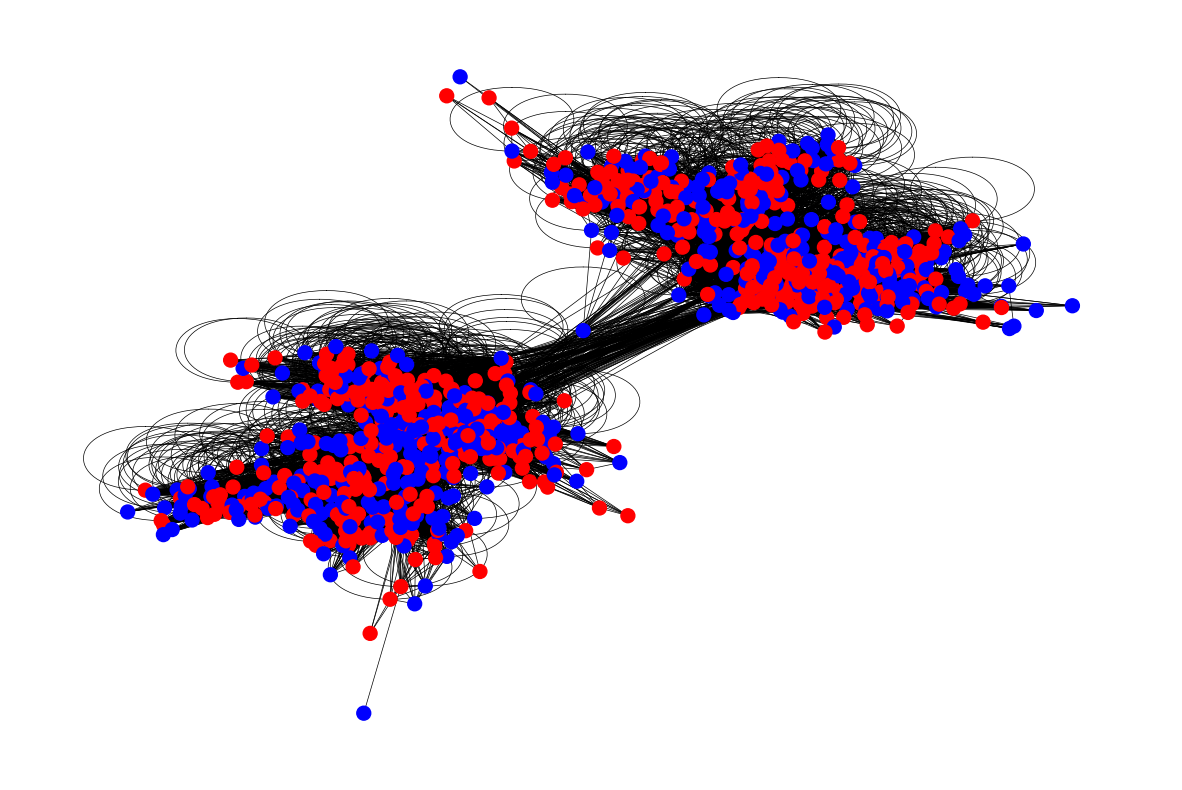

phase[1] z[0], logL = -795400.0259286695


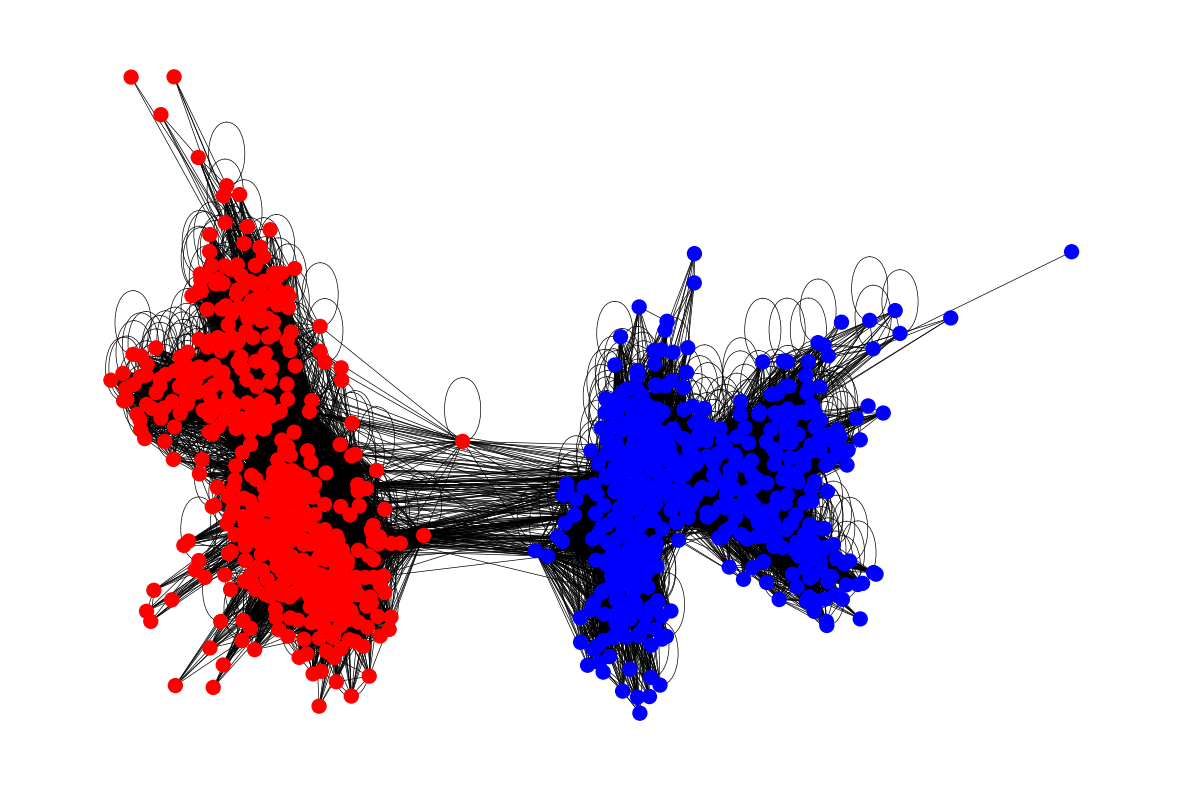

phase[2] z0, logL = -795400.0259286695


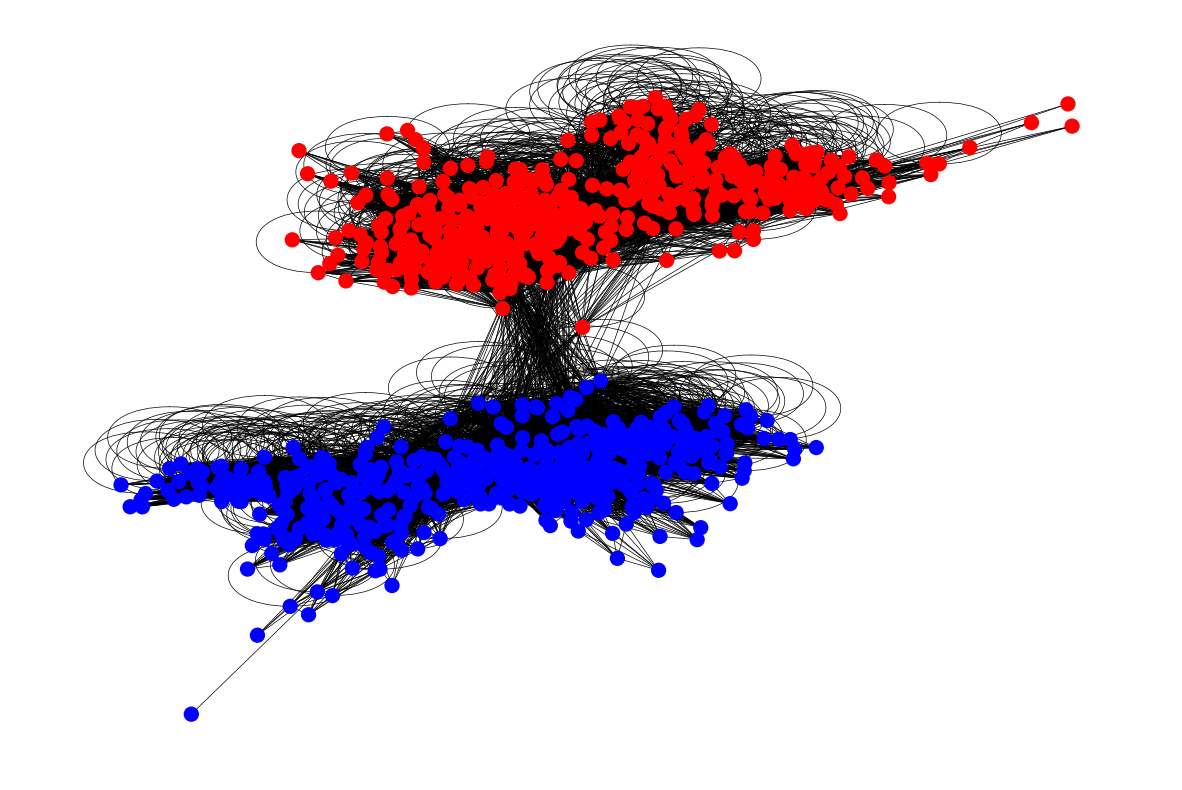

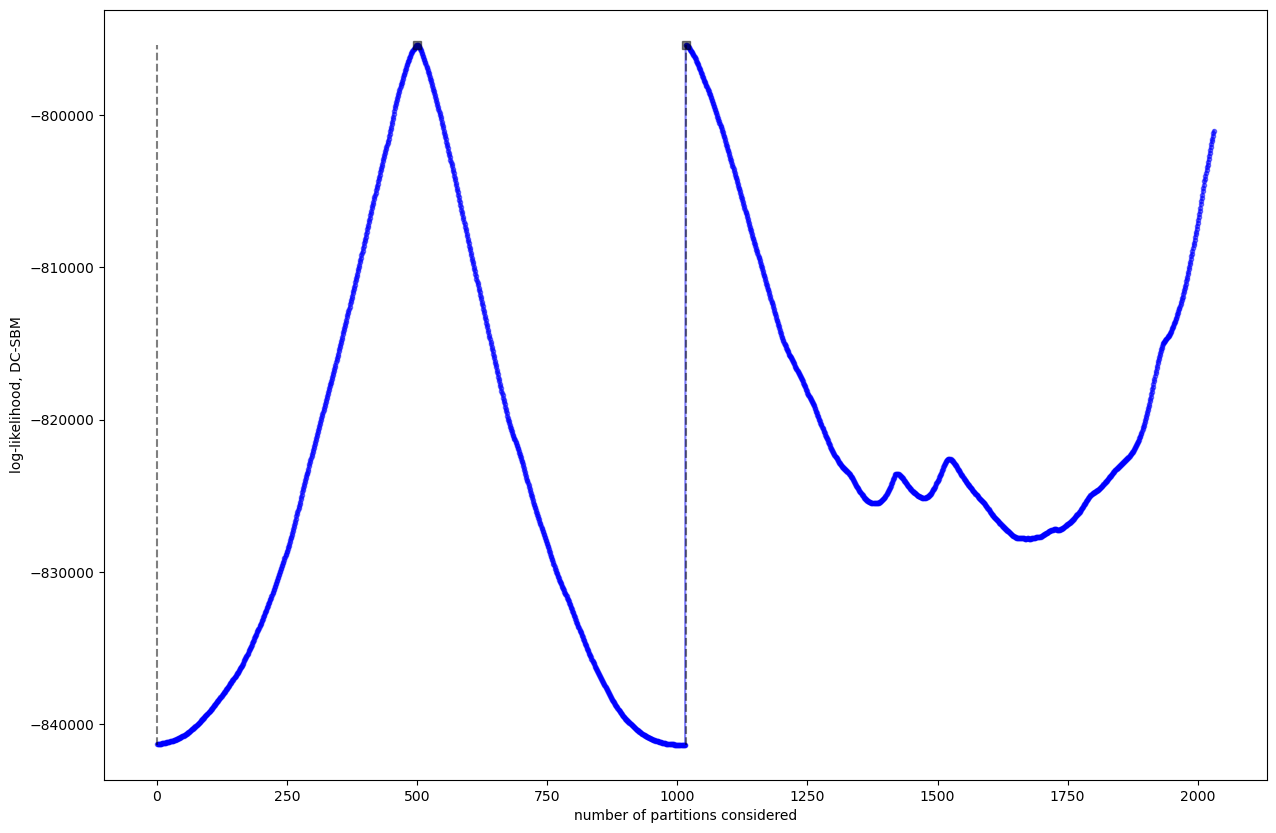

kappa_r = 
[37113. 37841.]
w_rs = 
[[36912.   201.]
 [  201. 37640.]]


In [365]:
c = 2
T = 10
zstar,Lstar,LL,pc = fit_DCSBM_op(G1,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G1,zstar)
plotLL(LL,pc,G1.order())
wrs,kpr = tabulate_wk(G1,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

>Full DCSBM on 0% confidence:

phase[0] z[0], logL = -837314.938238365


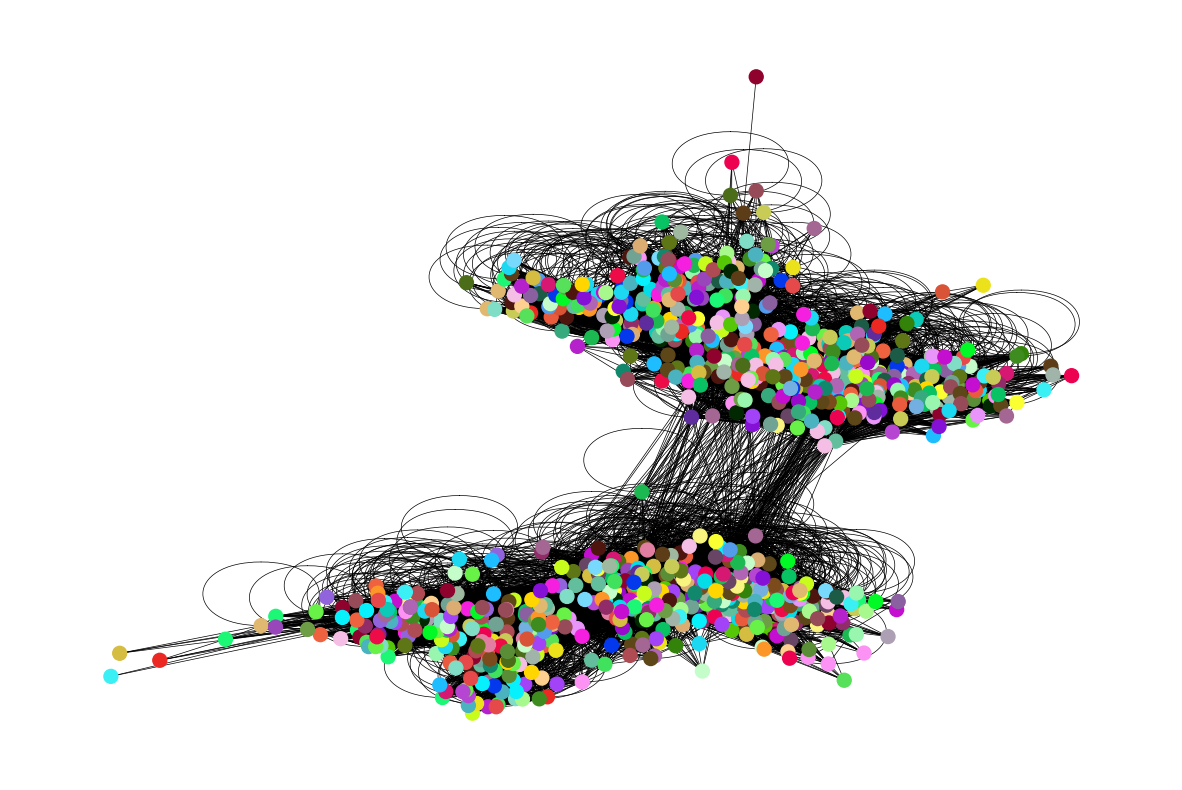

In [366]:
c = 83
T = 10
fname1 = 'budapest_connectome_low_confidence.graphml'
G1 = nx.read_graphml('./' + fname1)
zstar,Lstar,LL,pc = fit_DCSBM_op(G1,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G1,zstar)
plotLL(LL,pc,G1.order())
wrs,kpr = tabulate_wk(G1,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

number of nodes, n  = 480
number of edges, m  = 1000
mean degree,    <k> =  4.17
clustering coefficient, C     =  0.12


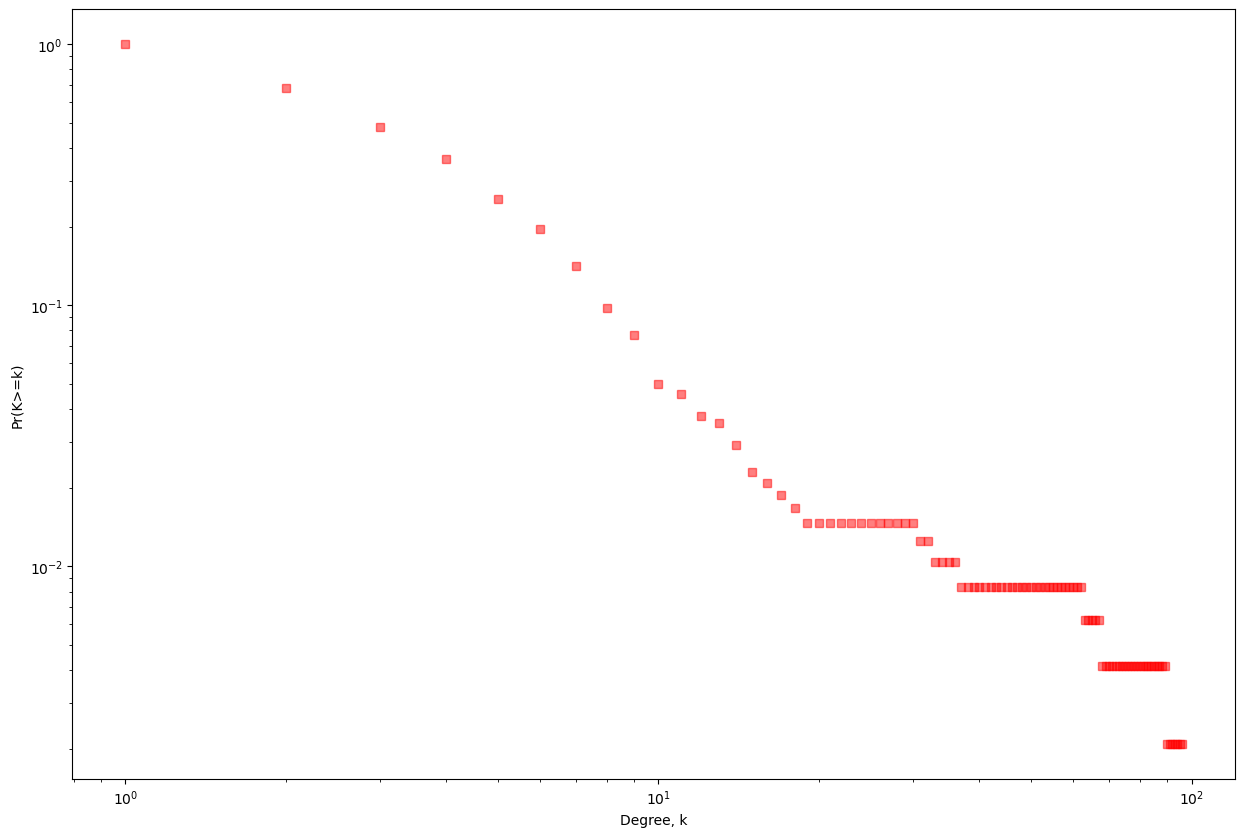

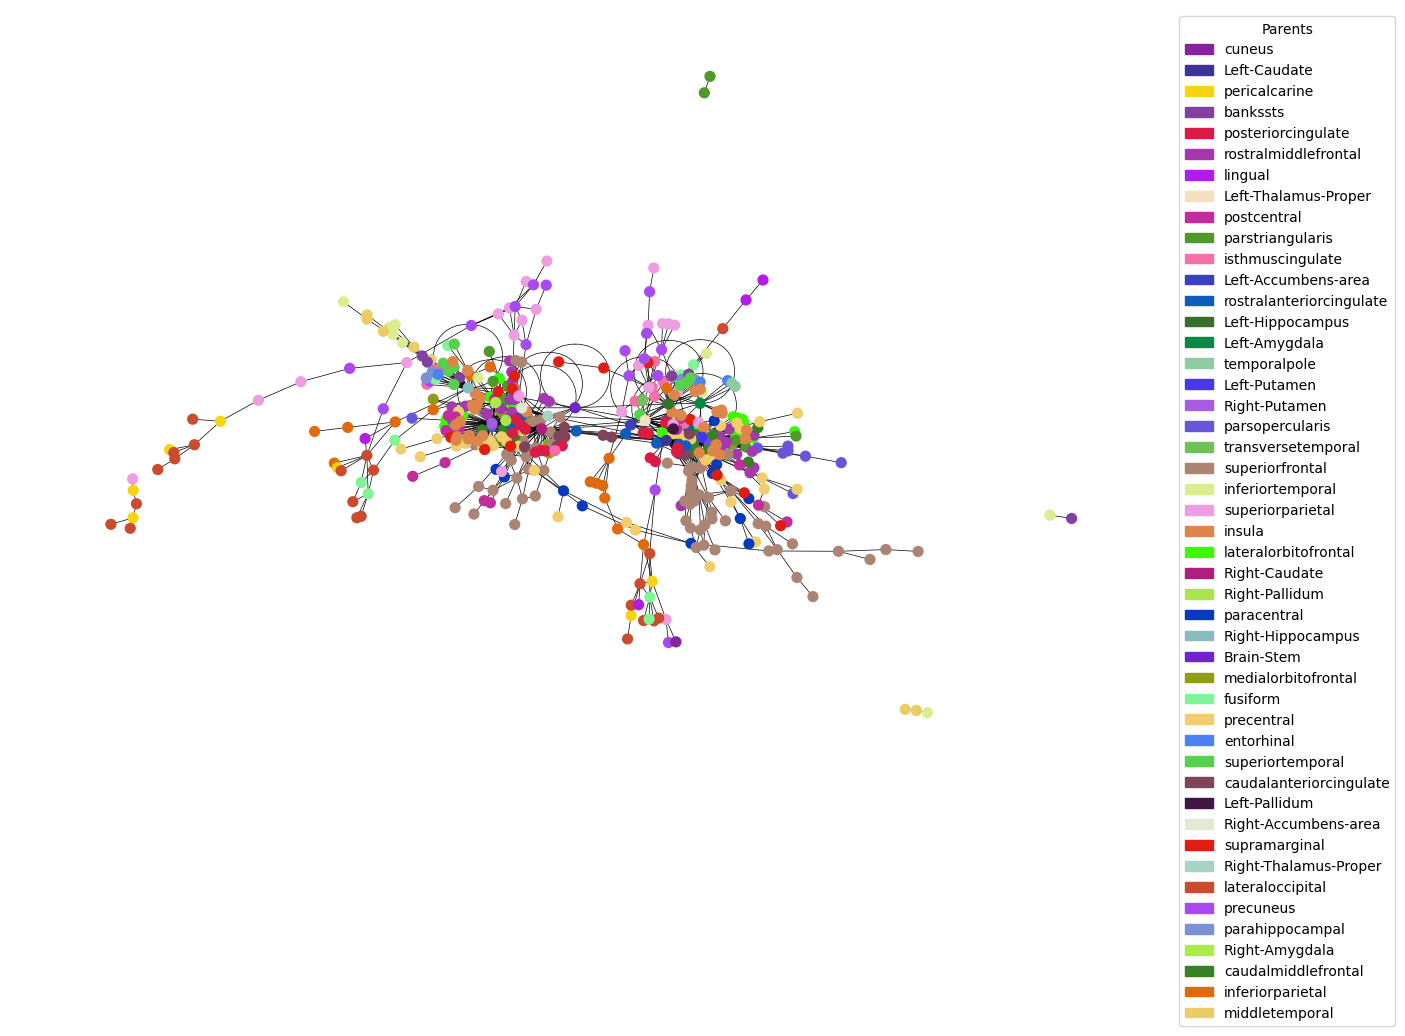

In [224]:
G2edges = nx.read_graphml('./' + fname2)
isolated_nodes = [n for n in G2edges.nodes() if G2edges.degree(n) == 0]
G2edges.remove_nodes_from(isolated_nodes) #testing removing nodes with no edges

compute_stats(G2edges,parent_colors)

>Full DCSBM on 50% confidence:

phase[0] z[0], logL = -14049.536444146735


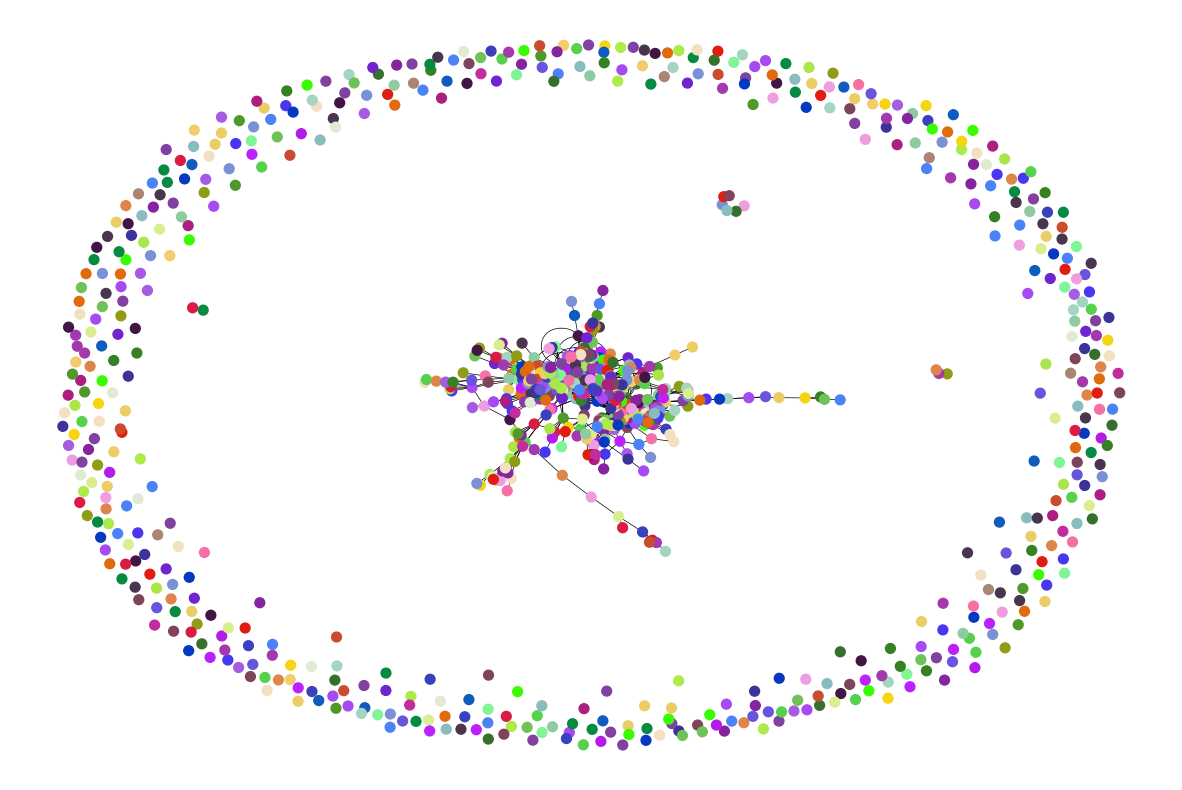

KeyboardInterrupt: 

In [240]:
c = 83
T = 10
zstar,Lstar,LL,pc = fit_DCSBM(G2,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G2,zstar)
plotLL(LL,pc,G2.order())
wrs,kpr = tabulate_wk(G2,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)

>Full DCSBM on 100% confidence:

phase[0] z[0], logL = -83.37030873879077


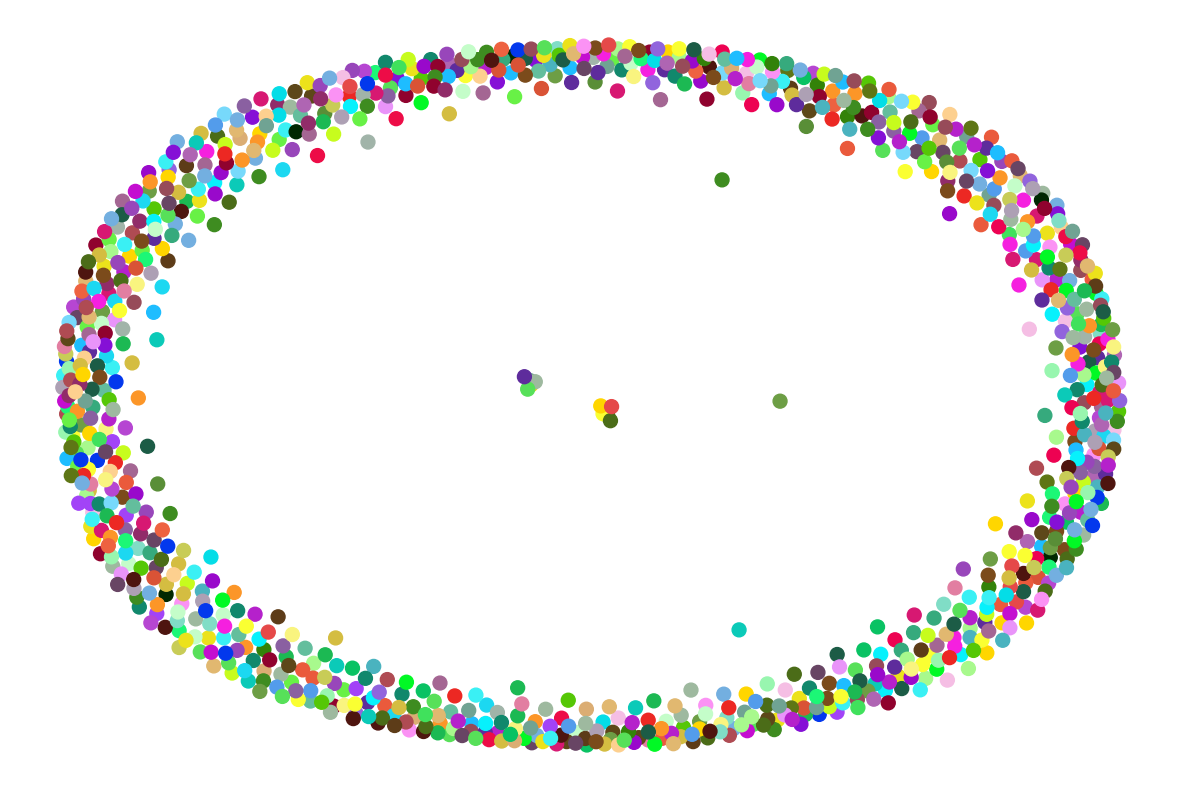

KeyboardInterrupt: 

In [364]:
c = 83
T = 10
zstar,Lstar,LL,pc = fit_DCSBM_op(G3,c,T)
print(f'phase[{pc}] z0, logL = {Lstar}')
drawGz(G3,zstar)
plotLL(LL,pc,G3.order())
wrs,kpr = tabulate_wk(G3,zstar,c)
print(f'kappa_r = ')
print(kpr)
print(f'w_rs = ')
print(wrs)